CISC 452 Project - Fake News Classification

[Project Document](https://docs.google.com/document/d/1Tv7F2FekBnIWUG2trPklvoZFMEhunhSry0VbfdoP_jI/edit?tab=t.0)

[Dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification?resource=download)

Import Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load & View Dataset

In [4]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
# remove first column

df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# count number of missing values from dataframe

df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
# fill null values with space

df.fillna(' ', inplace=True)
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

Distribution of Fake vs Real News

In [ ]:
# Label 1 = Fake-News, Label 0 = Real-News

label = df['label'].value_counts()
print(label)

label
1    37106
0    35028
Name: count, dtype: int64


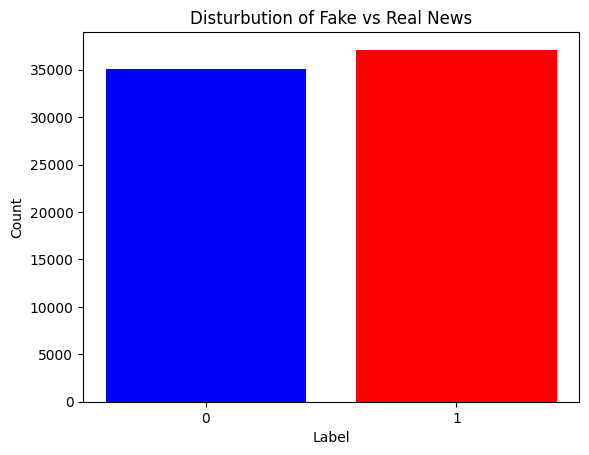

In [19]:
# Plot Distribution of Data

plt.bar(label.index, label.values, color=['red','blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Disturbution of Fake vs Real News')
plt.xticks([0, 1])
plt.show()
